In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [77]:
cap = cv2.VideoCapture("vtest.avi")

In [78]:
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,2] = 255
for i in range(8):
    ret, frame2 = cap.read()
next_ = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

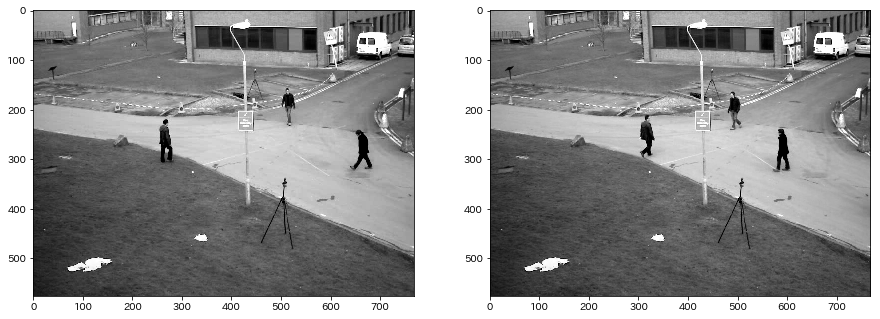

In [79]:
fig, ax=plt.subplots(1,2,figsize=(15, 7))
ax[0].imshow(prvs, cmap=plt.cm.gray)
ax[1].imshow(next_, cmap=plt.cm.gray)

In [80]:
flow = cv2.calcOpticalFlowFarneback(prvs,next_, None, 0.5, 3, 15, 3, 5, 1.2, 0)

In [81]:
height, width, _ = flow.shape
R2 = np.dstack(np.meshgrid(np.arange(width), np.arange(height)))
pixel_map = R2 + flow
est = cv2.remap(prvs, pixel_map.astype("f"), None, cv2.INTER_LINEAR)

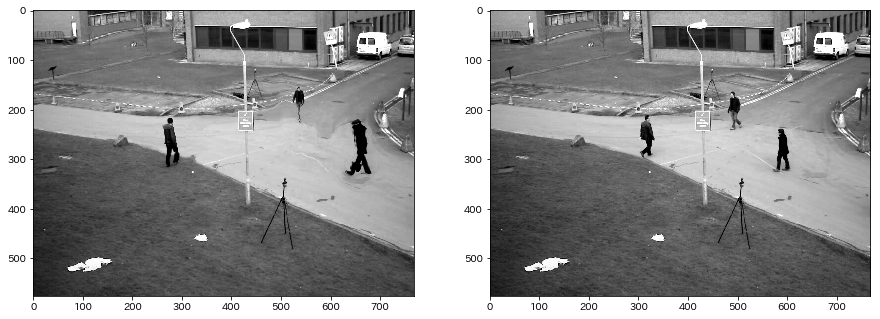

In [82]:
fig, ax=plt.subplots(1,2,figsize=(15, 7))
ax[0].imshow(est, cmap=plt.cm.gray)
ax[1].imshow(next_, cmap=plt.cm.gray)

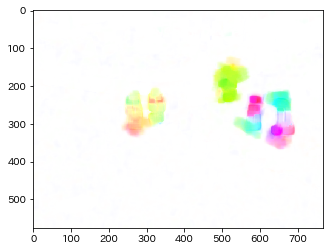

In [83]:
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,1] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
plt.imshow(rgb)